In [2]:
import pandas as pd

## Lecture des datas et normalisation

In [3]:
df = pd.read_csv('data/data.csv')
df['sex_norm'] = df['sex']
df.loc[df['sex_norm'] == 'female', 'sex_norm'] = 0
df.loc[df['sex_norm'] == 'male', 'sex_norm'] = 1

df['smoker_norm'] = df['smoker']
df.loc[df['smoker_norm'] == 'no', 'smoker_norm'] = 0
df.loc[df['smoker_norm'] == 'yes', 'smoker_norm'] = 1

df['charges'] = df['charges'].astype('int')

for region in df['region'].unique():
    r = f'is_{region}'
    df[r] = 0
    df.loc[df['region'] == region, r] = 1
    
df.rename(columns={'charges': 'target'}, inplace=True)

print(df.shape)
df.head()

(1338, 13)


,age,sex,bmi,children,smoker,region,target,sex_norm,smoker_norm,is_southwest,is_southeast,is_northwest,is_northeast
0,19,female,27.900,0,yes,southwest,16884,0,1,1,0,0,0
1,18,male,33.770,1,no,southeast,1725,1,0,0,1,0,0
2,28,male,33.000,3,no,southeast,4449,1,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984,1,0,0,0,1,0
4,32,male,28.880,0,no,northwest,3866,1,0,0,0,1,0


## Vérification des datas
*y a-t-il des valeurs nulles ?*

In [4]:
print(df.isnull().sum())
print()
df.info()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
target          0
sex_norm        0
smoker_norm     0
is_southwest    0
is_southeast    0
is_northwest    0
is_northeast    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   target        1338 non-null   int64  
 7   sex_norm      1338 non-null   object 
 8   smoker_norm   1338 non-null   object 
 9   is_southwest  1338 non-null   int64  
 10  is_southeast  1338 non-null   int64  
 11  is_northwest  1338 non-null   int64  
 12  is_northeast  1338 non-null   int64  


In [5]:
df.describe()

,age,bmi,children,target,is_southwest,is_southeast,is_northwest,is_northeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13269.928999,0.242900,0.272048,0.242900,0.242152
std,14.049960,6.098187,1.205493,12110.012755,0.428995,0.445181,0.428995,0.428546
min,18.000000,15.960000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9381.500000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.250000,0.000000,1.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000


# Doublons

In [6]:
df.loc[df.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,target,sex_norm,smoker_norm,is_southwest,is_southeast,is_northwest,is_northeast
195,19,male,30.59,0,no,northwest,1639,1,0,0,0,1,0
581,19,male,30.59,0,no,northwest,1639,1,0,0,0,1,0


# Outliers

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
# transform data 
limit = 3
d = df[['age', 'bmi', 'children', 'smoker_norm', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']]
outliers_std = pd.DataFrame(scaler.fit_transform(d), columns=d.columns)
outliers = outliers_std.loc[outliers_std.values > limit]
outliers

,age,bmi,children,smoker_norm,is_southwest,is_southeast,is_northwest,is_northeast
32,-1.438764,-0.338489,3.240619,-0.507463,1.765481,-0.611324,-0.566418,-0.565267
71,-0.584350,-0.354893,3.240619,-0.507463,-0.566418,-0.611324,-0.566418,1.769076
116,1.338082,3.017861,-0.908614,-0.507463,-0.566418,1.635795,-0.566418,-0.565267
166,-1.367563,1.039485,3.240619,-0.507463,1.765481,-0.611324,-0.566418,-0.565267
413,-1.011557,-1.109498,3.240619,-0.507463,1.765481,-0.611324,-0.566418,-0.565267
425,0.412467,-1.042240,3.240619,-0.507463,-0.566418,1.635795,-0.566418,-0.565267
438,0.910875,2.638918,3.240619,-0.507463,-0.566418,1.635795,-0.566418,-0.565267
568,0.697271,0.202858,3.240619,-0.507463,1.765481,-0.611324,-0.566418,-0.565267
640,-0.441948,1.925325,3.240619,-0.507463,1.765481,-0.611324,-0.566418,-0.565267
847,-1.153959,3.234400,-0.078767,-0.507463,-0.566418,1.635795,-0.566418,-0.565267


# Corrélation

<Axes: >

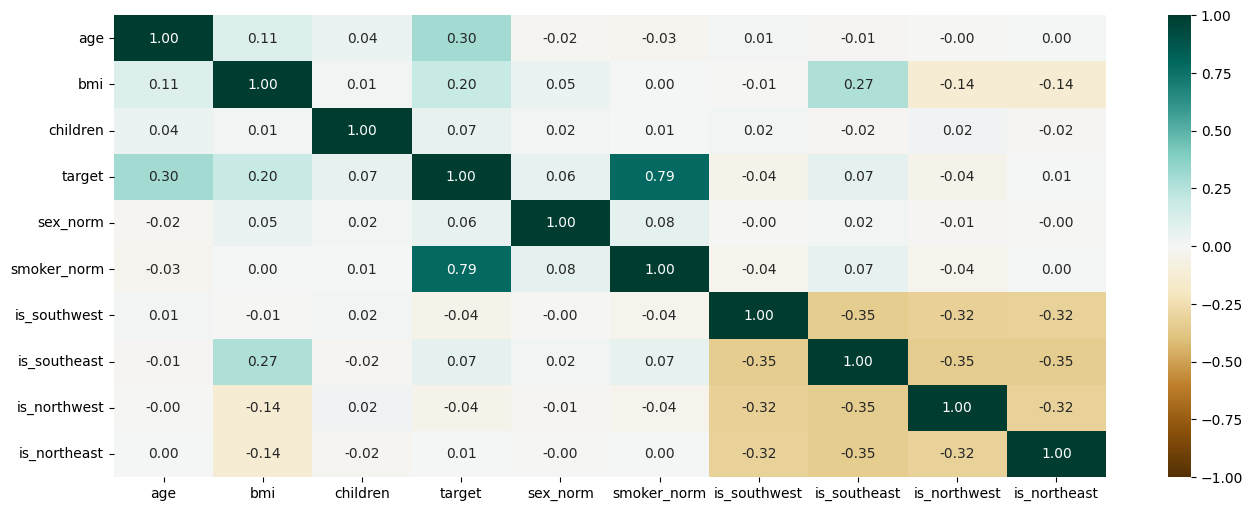

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
df2 = df.drop(['sex', 'smoker', 'region'], axis=1)
plt.figure(figsize=(16, 6))
sns.heatmap(df2.corr(method='pearson'), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='BrBG')